In [27]:
import pandas as pd
import numpy as np
import csv 
import random
import math
import matplotlib.pyplot as plt

In [28]:
#Getting the data 
data_array = np.genfromtxt("cm_dataset_2 - cm_dataset.csv" , dtype = 'float64',delimiter=',',)
#Number of data points
Num_of_data_points = data_array.shape[0]
#Dimension of each data point
Dimension_of_data_point = data_array.shape[1]
#initialising the cluster
Cluster_type = np.full((Num_of_data_points) , 0)


In [29]:
def Kernal_Matrix_Func(data_array , type , Variance_or_Power_of_Polynomial , Num_of_data_points):
    Kernal_Matrix = np.full((Num_of_data_points , Num_of_data_points), 0.00 , dtype= 'float64')
    #Polynomial Kernal
    if type == 0 :
        Kernal_Matrix = (np.full((Num_of_data_points,Num_of_data_points) , 1.0 , dtype='float64') + np.matmul(data_array , data_array.transpose()))**Variance_or_Power_of_Polynomial
    #Radial Kernal 
    if type == 1 :
        for i in range(Num_of_data_points):
            for j in range(Num_of_data_points):
                Kernal_Matrix[i][j] = math.exp((-1 * np.sum(np.square(data_array[i] - data_array[j])))/(2*Variance_or_Power_of_Polynomial*Variance_or_Power_of_Polynomial))
        #Finding mean transpose dot mean and filling a matrix n*n with it's values 
    Mean_transpose_dot_Mean = np.sum(Kernal_Matrix) / (Num_of_data_points**2)
    Mean_transpose_dot_Mean_Matrix = np.full((Num_of_data_points,Num_of_data_points) , Mean_transpose_dot_Mean , dtype='float64')

    Row_Sum_Matrix = np.full((Num_of_data_points,Num_of_data_points) , 0.0 , dtype='float64')
    Column_Sum_Matrix = np.full((Num_of_data_points,Num_of_data_points) , 0.0 , dtype='float64')

    #Finding the sum of the rows divided by number of data points 
    for i in range(Num_of_data_points):
        Row_Sum_Matrix[i] = np.full(Num_of_data_points,np.sum(Kernal_Matrix[i]) ,dtype='float64')
    Row_Sum_Matrix /= Num_of_data_points
    
    #Finding the sum of the columns divided by number of data points 
    for j in range(Num_of_data_points):
        Column_Sum_Matrix[:,j] = np.full(Num_of_data_points,np.sum(Kernal_Matrix[:,j]) ,dtype='float64')
    Column_Sum_Matrix /= Num_of_data_points

    #Finding the Centralised Matrix 
    Kernal_Matrix_After_Centralised = Kernal_Matrix - Row_Sum_Matrix - Column_Sum_Matrix + Mean_transpose_dot_Mean_Matrix
    return Kernal_Matrix_After_Centralised

80226.35124456795
94658.00261663263
72763.79146510891
94303.79172973215
63831.20324515992
62280.75848018117
59712.384172569116
60892.4686607773
69982.87395448571


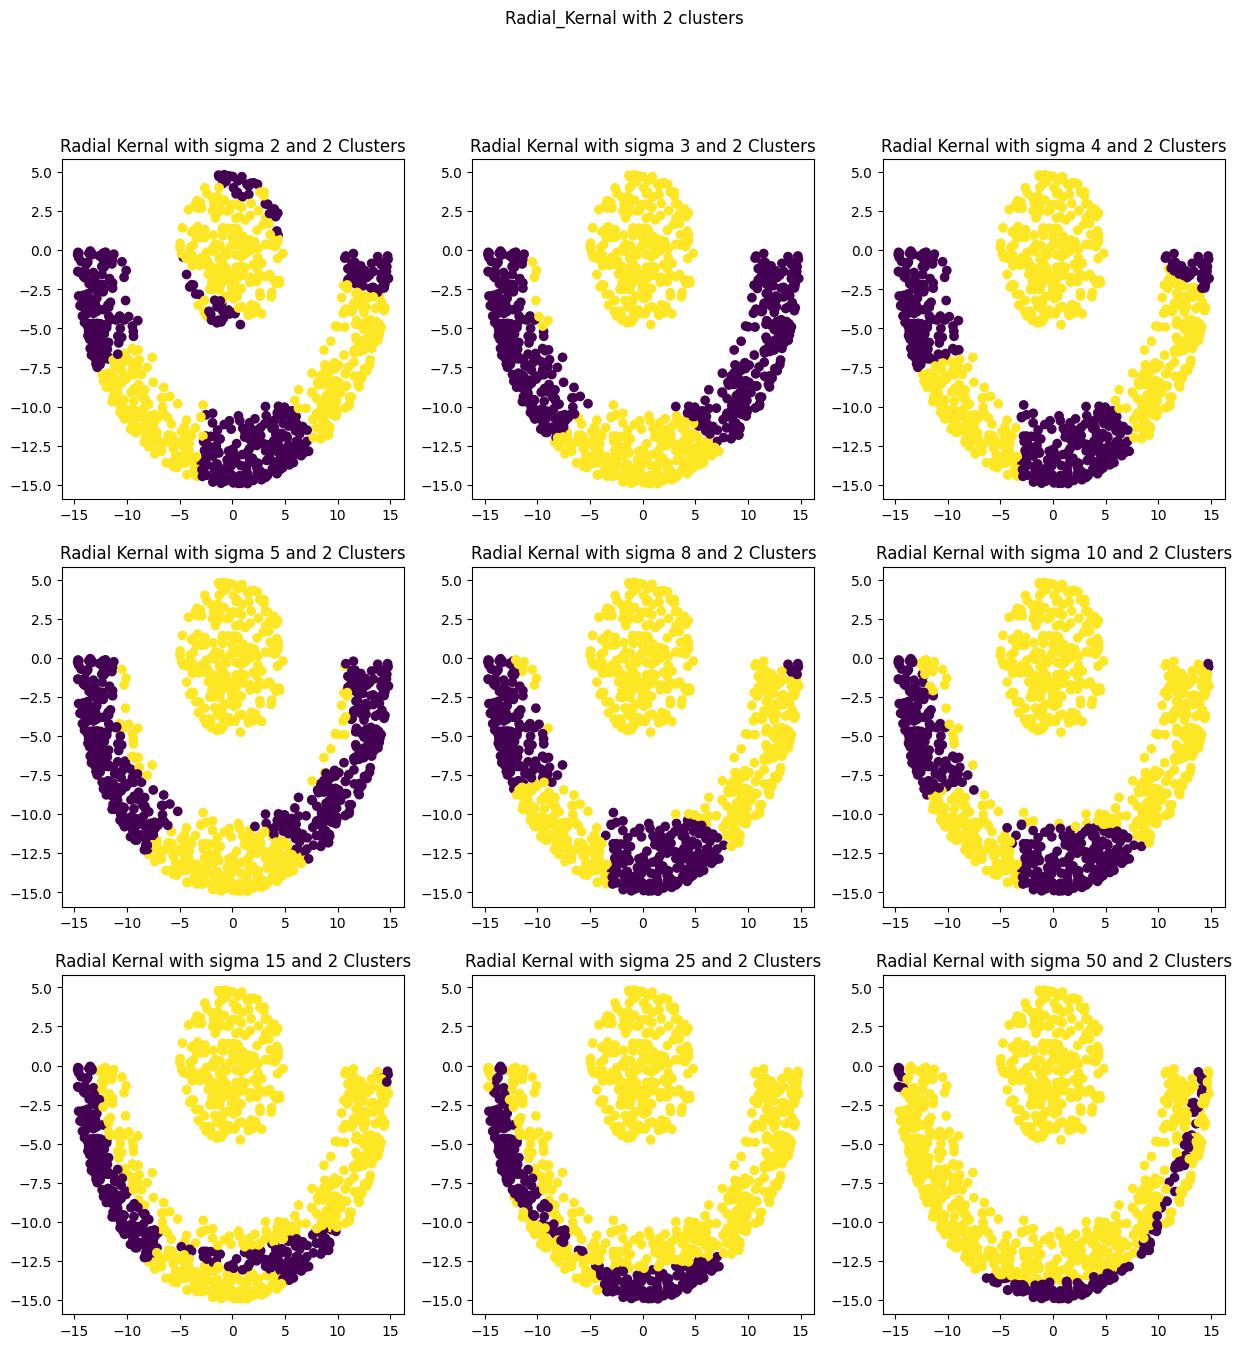

In [30]:

fig , axes = plt.subplots(3, 3 , figsize = (15 , 15))
#Change the following values for sigma or Power according to the kernal used 
variance_or_Power = [ 2 ,3 ,4 ,5 ,8 ,10 ,15 ,25 ,50]
for var in range(len(variance_or_Power)):
    Kernal_Matrix = np.full((Num_of_data_points , Num_of_data_points) ,0.00, dtype= 'float64')
    #Change the type to 0 for polynomial kernal and 1 for radial kernal while passing the parameters 
    Kernal_Matrix = Kernal_Matrix_Func(data_array=data_array , type= 0 , Variance_or_Power_of_Polynomial= variance_or_Power[var] ,Num_of_data_points= Num_of_data_points)

    Kernal_Eigenvalues , Kernal_Eigenvectors = np.linalg.eigh(Kernal_Matrix)

    #Sorting eigenvectors in the descending orders of their respective eigenvalues
    Kernal_Eigenvectors = Kernal_Eigenvectors[:,np.flip(np.argsort(Kernal_Eigenvalues))]

    #Sorting the eigenvalues in descending order
    Kernal_Eigenvalues = Kernal_Eigenvalues[np.flip(np.argsort(Kernal_Eigenvalues))]

    #Change here for changing the number of clusters throughout the code  
    Num_of_Clusters = 2


    Top_Eigenvectors = np.full((Num_of_data_points,Num_of_Clusters),0.0,dtype = 'float64')

    for i in range(Num_of_Clusters):
        Top_Eigenvectors[:,i] = Kernal_Eigenvectors[:,i]


    for i in range(Num_of_data_points):
         Top_Eigenvectors[i] = Top_Eigenvectors[i] / math.sqrt(np.sum(np.square(Top_Eigenvectors[i])))
    #Cluster Assignment
    for i in range(Num_of_data_points):
        Cluster_type[i] = np.argmax(abs(Top_Eigenvectors[i]))


    Mean_of_Clusters = np.full((Num_of_Clusters , Dimension_of_data_point) , 0 , dtype='float64')
    Num_of_points_in_each_cluster = np.full((Num_of_Clusters), 0)

    #Finding the mean of clusters and the number of points in each cluster
    for i  in range(Num_of_data_points):
            Mean_of_Clusters[Cluster_type[i]] += data_array[i]
            Num_of_points_in_each_cluster[Cluster_type[i]] += 1

    for i in range(Num_of_Clusters):
            Mean_of_Clusters[i] /= Num_of_points_in_each_cluster[i]

    #Finding the error for the respective kernal used 
    Error = 0
    for i in range(Num_of_data_points):
        Distance_square_from_mean = np.full((Num_of_Clusters),0.0 , dtype= 'float64')
        for j in range(Num_of_Clusters):
            Distance_square_from_mean[j] = np.sum(np.square((data_array[i] - Mean_of_Clusters[j]))) 
    
        Error += Distance_square_from_mean.min()

    colormap = np.array([0.1 , 0.2 , 0.3 ,0.4 , 0.5])

    axes[var//3 , var % 3].scatter(data_array[:,0] , data_array[:,1], c = colormap[Cluster_type])
    axes[var//3 , var % 3].set_title(f"Radial Kernal with sigma {variance_or_Power[var]} and {Num_of_Clusters} Clusters")
    #Error assosciated with this iterations value of sigma or power 
    print(Error)
fig.suptitle(f"Radial_Kernal with {Num_of_Clusters} clusters")
'''plt.savefig(f"Radial_Kernal with {Num_of_Clusters} clusters")'''
plt.show()

In [31]:
'''#
#Error = []
#Num_of_iterations = 0
#while (True):
#    Error_in_ith_iteration = 0
#    Prev_Cluster_type = Cluster_type.copy()
#    Num_of_iterations += 1 
#
#    for i in range(Num_of_data_points):
#        Distance_square_from_mean = np.full((Num_of_Clusters),0.0 , dtype= 'float64')
#        for j in range(Num_of_Clusters):
#            Distance_square_from_mean[j] = np.sum(np.square((Top_Eigenvectors[i] - Mean_of_Clusters[j]))) 
# 
#        Error_in_ith_iteration += Distance_square_from_mean.min()
#        Cluster_type[i] = np.argmin(Distance_square_from_mean)
#    Error.append(Error_in_ith_iteration)
#    Mean_of_Clusters = np.full((Num_of_Clusters , Dimension_of_data_point) , 0.0 , dtype='float64')
#    Num_of_points_in_each_cluster = np.full((Num_of_Clusters), 0)
#    
#    for i  in range(Num_of_data_points):
#        Mean_of_Clusters[Cluster_type[i]] += Top_Eigenvectors[i]
#        Num_of_points_in_each_cluster[Cluster_type[i]] += 1
#   
#    plt.scatter(data_array[:,0] , data_array[:,1], c = colormap[Cluster_type])
#    plt.show()
#
#
#
#   # for i in range(Num_of_Clusters ):
#   #     if(Num_of_points_in_each_cluster[i] == 0):
#   #         rand = random.randint(0, Num_of_data_points-1)
#   #         if(Num_of_points_in_each_cluster[Cluster_type[rand]] > 2):
#   #             Num_of_points_in_each_cluster[Cluster_type[rand]] += -1
#   #             Mean_of_Clusters[Cluster_type[rand]] -= data_array[rand]
#   #             Num_of_points_in_each_cluster[i] += 1
#   #             Cluster_type[rand] = i
#            
#
#    for i in range(Num_of_Clusters):
#        Mean_of_Clusters[i] /= Num_of_points_in_each_cluster[i]
#    if ((Prev_Cluster_type == Cluster_type).all()):
#        break
#    
#
#
#plt.plot( np.linspace(1 , Num_of_iterations , Num_of_iterations), np.array(Error) )
#plt.show() '''